# Anomaly Detection Challenge 4
## Miguel Sandim and Paula Fortuna

## 0 - Library Imports & Utils

In [1]:
# json
import json

# math
import math

# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Random libraries and seeds:
import random
random.seed(2)
np.random.seed(2)

pd.set_option('display.max_columns', None)

In [48]:
# From: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


# 1 - Data Reading

### 1.1 Load data

In [3]:
def readData(filename):
    data = []
    with open(filename) as f:
        for line in f:
            data.append(json.loads(line))
            
    return pd.io.json.json_normalize(data)

In [4]:
train_df = readData("data/training_set_dedup.csv")

In [5]:
test_df = readData("data/test_set_dedup.csv")

### Save data for Paula:

In [ ]:
train_df.to_csv("train_df.csv", index = False, encoding='utf-8')

In [ ]:
test_df.to_csv("test_df.csv", index = False, encoding='utf-8')

### Some statistics:

In [ ]:
train_df

In [ ]:
type(train_df["results.peinfo.exports"][0][0])

In [ ]:
math.isnan(train_df["results.peinfo.debug"][20])

In [ ]:
train_df["label"].value_counts()

In [ ]:
41/(41 + 56000) * 100

## About 0.07% of our dataset are anomalous cases.

# 2 - Data Pre-Processing

In [6]:
import sklearn.preprocessing as skpre

## 2.1 - Solve Missing Values

No missing values exist!

## 2.2 - Feature Extraction

Change label to numeric

In [7]:
train_df

label                               results.peinfo.debug  \
0        benign  [{'SizeOfData': 39, 'TimeDateStamp': 136692140...   
1        benign  [{'SizeOfData': 35, 'TimeDateStamp': 117169200...   
2        benign  [{'SizeOfData': 35, 'TimeDateStamp': 137713790...   
3        benign  [{'SizeOfData': 35, 'TimeDateStamp': 111171130...   
4        benign  [{'SizeOfData': 34, 'TimeDateStamp': 137716676...   
5        benign                                                NaN   
6        benign  [{'SizeOfData': 35, 'TimeDateStamp': 111171048...   
7        benign  [{'SizeOfData': 39, 'TimeDateStamp': 113273668...   
8        benign  [{'SizeOfData': 37, 'TimeDateStamp': 104579566...   
9        benign  [{'SizeOfData': 34, 'TimeDateStamp': 132953751...   
10       benign  [{'SizeOfData': 35, 'TimeDateStamp': 109159922...   
11       benign  [{'SizeOfData': 37, 'TimeDateStamp': 117169209...   
12       benign  [{'SizeOfData': 37, 'TimeDateStamp': 111171124...   
13       benign  [{'SizeOfData': 34, 'TimeDateStamp': 116245845...   
14       benign  [{'SizeOfData': 36, 'TimeDateStamp': 111170753...   
15       benign  [{'SizeOfData': 32, 'TimeDateStamp': 109159914...   
16       benign  [{'SizeOfData': 37, 'TimeDateStamp': 111171197...   
17       benign  [{'SizeOfData': 272, 'TimeDateStamp': 94237482...   
18       benign  [{'SizeOfData': 272, 'TimeDateStamp': 10170924...   
19       benign  [{'SizeOfData': 35, 'TimeDateStamp': 117169231...   
20       benign                                                NaN   
21       benign  [{'SizeOfData': 36, 'TimeDateStamp': 109113097...   
22       benign  [{'SizeOfData': 29, 'TimeDateStamp': 984453848...   
23       benign  [{'SizeOfData': 24, 'TimeDateStamp': 990577069...   
24       benign  [{'SizeOfData': 36, 'TimeDateStamp': 109159944...   
25       benign  [{'SizeOfData': 29, 'TimeDateStamp': 998106942...   
26       benign  [{'SizeOfData': 37, 'TimeDateStamp': 111171189...   
27       benign  [{'SizeOfData': 272, 'TimeDateStamp': 93825734...   
28       benign  [{'SizeOfData': 35, 'TimeDateStamp': 111171119...   
29       benign  [{'SizeOfData': 28, 'TimeDateStamp': 104857645...   
...         ...                                                ...   
9724  malicious                                                NaN   
9725  malicious                                                NaN   
9726  malicious                                                NaN   
9727  malicious                                                NaN   
9728  malicious                                                NaN   
9729  malicious                                                NaN   
9730  malicious                                                NaN   
9731  malicious                                                NaN   
9732  malicious                                                NaN   
9733  malicious                                                NaN   
9734  malicious  [{'SizeOfData': 127, 'TimeDateStamp': 13607981...   
9735  malicious                                                NaN   
9736  malicious                                                NaN   
9737  malicious                                                NaN   
9738  malicious                                                NaN   
9739  malicious                                                NaN   
9740  malicious                                                NaN   
9741  malicious                                                NaN   
9742  malicious                                                NaN   
9743  malicious                                                NaN   
9744  malicious                                                NaN   
9745  malicious                                                NaN   
9746  malicious                                                NaN   
9747  malicious                                                NaN   
9748  malicious                                                NaN   
9749  malicious     

In [8]:
test_df

peinfo.debug  \
0      [{'SizeOfData': 42, 'TimeDateStamp': 129773268...   
1                                                    NaN   
2      [{'SizeOfData': 33, 'TimeDateStamp': 137713977...   
3                                                    NaN   
4                                                    NaN   
5      [{'SizeOfData': 36, 'TimeDateStamp': 111171181...   
6      [{'SizeOfData': 60, 'TimeDateStamp': 137714484...   
7      [{'SizeOfData': 60, 'TimeDateStamp': 137714503...   
8                                                    NaN   
9                                                    NaN   
10     [{'SizeOfData': 28, 'TimeDateStamp': 106744935...   
11                                                   NaN   
12                                                   NaN   
13                                                   NaN   
14                                                   NaN   
15                                                   NaN   
16     [{'SizeOfData': 33, 'TimeDateStamp': 124752712...   
17     [{'SizeOfData': 272, 'TimeDateStamp': 93825927...   
18     [{'SizeOfData': 81, 'TimeDateStamp': 138588530...   
19     [{'SizeOfData': 27, 'TimeDateStamp': 104858285...   
20                                                   NaN   
21     [{'SizeOfData': 51, 'TimeDateStamp': 942439699...   
22     [{'SizeOfData': 38, 'TimeDateStamp': 124752734...   
23     [{'SizeOfData': 37, 'TimeDateStamp': 124752707...   
24     [{'SizeOfData': 70, 'TimeDateStamp': 136307830...   
25     [{'SizeOfData': 39, 'TimeDateStamp': 136692140...   
26     [{'SizeOfData': 35, 'TimeDateStamp': 117169200...   
27                                                   NaN   
28     [{'SizeOfData': 29, 'TimeDateStamp': 104857620...   
29                                                   NaN   
...                                                  ...   
46754  [{'SizeOfData': 272, 'TimeDateStamp': 10474921...   
46755                                                NaN   
46756                                                NaN   
46757                                                NaN   
46758  [{'SizeOfData': 272, 'TimeDateStamp': 93408362...   
46759                                                NaN   
46760                                                NaN   
46761                                                NaN   
46762                                                NaN   
46763  [{'SizeOfData': 24, 'TimeDateStamp': 998081828...   
46764                                                NaN   
46765  [{'SizeOfData': 27, 'TimeDateStamp': 998081482...   
46766                                                NaN   
46767  [{'SizeOfData': 70, 'TimeDateStamp': 136307830...   
46768                                                NaN   
46769  [{'SizeOfData': 35, 'TimeDateStamp': 117169109...   
46770                                                NaN   
46771                                                NaN   
46772  [{'SizeOfData': 37, 'TimeDateStamp': 107549051...   
46773                                                NaN   
46774                                                NaN   
46775                                                NaN   
46776  [{'SizeOfData': 90, 'TimeDateStamp': 134438701...   
46777  [{'SizeOfData': 37, 'TimeDateStamp': 111171108...   
46778                                                NaN   
46779  [{'SizeOfData': 272, 'TimeDateStamp': 10480221...   
46780                                                NaN   
46781                                                NaN   
46782  [{'SizeOfData': 39, 'TimeDateStamp': 137713975...   
46783                                                NaN   

                                            peinfo.error  \
0                                                    NaN   
1                                                    NaN   
2                                                    NaN   
3                                                    NaN   
4                      

In [9]:
train_df["label_numeric"] = train_df.apply(lambda x: 1 if x["label"] == "malicious" else 0, axis=1)

In [10]:
def has_debug(data, column_name):
    data["has_debug"] = data.apply(lambda x: 1 if (type(x[column_name]) is list) else 0, axis=1)

has_debug(train_df, "results.peinfo.debug")
has_debug(test_df, "peinfo.debug")

In [11]:
def size_imports(data, column_name):
    data["size_imports"] = data.apply(lambda x: len(x[column_name])
                                          if (type(x[column_name]) is list) else 0, axis=1)

size_imports(train_df, "results.peinfo.imports")
size_imports(test_df, "peinfo.imports")

In [12]:
def size_exports(data, column_name):
    data["size_exports"] = data.apply(lambda x: len(x[column_name])
                                          if (type(x[column_name]) is list) else 0, axis=1)

size_exports(train_df, "results.peinfo.exports")
size_exports(test_df, "peinfo.exports")

In [13]:
def pe_section_mean_size(data, column_name):
    data["pe_section_mean_size"] = data.apply(lambda x: np.mean([y["size"] for y in x[column_name]])
                                          if (type(x[column_name]) is list and 
                                              len(x[column_name]) > 0) else 0, axis=1)

pe_section_mean_size(train_df, "results.peinfo.pe_sections")
pe_section_mean_size(test_df, "peinfo.pe_sections")

In [14]:
def pe_section_mean_virtual_size(data, column_name):
    data["pe_section_mean_virtual_size"] = data.apply(lambda x: np.mean([y["virt_size"] for y in x[column_name]])
                                          if (type(x[column_name]) is list and 
                                              len(x[column_name]) > 0) else 0, axis=1)

pe_section_mean_virtual_size(train_df, "results.peinfo.pe_sections")
pe_section_mean_virtual_size(test_df, "peinfo.pe_sections")

In [15]:
def pe_section_mean_entropy(data, column_name):
    data["pe_section_mean_entropy"] = data.apply(lambda x: np.mean([y["entropy"] for y in x[column_name]])
                                          if (type(x[column_name]) is list and 
                                              len(x[column_name]) > 0) else 0, axis=1)

pe_section_mean_entropy(train_df, "results.peinfo.pe_sections")
pe_section_mean_entropy(test_df, "peinfo.pe_sections")

In [16]:
# results.peinfo.rich_header.checksum is already calculated
train_df = train_df.rename(columns = {'results.peinfo.rich_header.checksum':'peinfo.rich_header.checksum'})

In [17]:
def rich_header_size_values_parsed(data, column_name):
    data["rich_header_size_values_parsed"] = data.apply(lambda x: len(x[column_name])
                                          if (type(x[column_name]) is list) else 0, axis=1)

rich_header_size_values_parsed(train_df, "results.peinfo.rich_header.values_parsed")
rich_header_size_values_parsed(test_df, "peinfo.rich_header.values_parsed")

In [18]:
def rich_header_size_values_raw(data, column_name):
    data["rich_header_size_values_raw"] = data.apply(lambda x: len(x[column_name])
                                          if (type(x[column_name]) is list) else 0, axis=1)

#rich_header_size_values_raw(train_df, "results.peinfo.rich_header.values_raw")
#rich_header_size_values_raw(test_df, "peinfo.rich_header.values_raw")

In [19]:
train_df.groupby(['label']).mean()

results.peinfo.rich_header  peinfo.rich_header.checksum  \
label                                                                
benign                            NaN                 2.192955e+09   
malicious                         NaN                 2.166347e+09   

           results.peinfo.timestamp.timestamp  label_numeric  has_debug  \
label                                                                     
benign                           1.065898e+09            0.0   0.809634   
malicious                        1.223420e+09            1.0   0.117400   

           size_imports  size_exports  pe_section_mean_size  \
label                                                         
benign       107.287547     38.519773          67472.626526   
malicious    134.430600      2.790800         313722.160558   

           pe_section_mean_virtual_size  pe_section_mean_entropy  \
label                                                              
benign                     69089.419439                 3.756720   
malicious                 169368.557166                 4.362899   

           rich_header_size_values_parsed  
label                                      
benign                           6.311527  
malicious                        5.777800

## 2.4 Sampling

### 2.4.1 Undersampling

In [ ]:
def undersampling(data):
    ids_to_sample = data[data["label"] == 0].index.values
    sample_size = data[data["label"] == 1].shape[0]
    anomalies = data[data["label"] == 1].index.values
    
    final_ids = np.append(np.random.choice(ids_to_sample, size = sample_size), anomalies)
    #print(ids_to_sample)
    #data[fake_review]
    return data.iloc[final_ids]
    
#train_df = undersampling(train_df)  

### 2.4.2 Oversampling

In [ ]:
def oversampling(data):
    anomalies = data[data["fake_review"] == "Y"]
    data = data.append(anomalies)
    data = data.append(anomalies)
    data = data.append(anomalies)
    data = data.append(anomalies)
    data = data.append(anomalies)
    data = data.append(anomalies)
    return data

#train_df_joined = oversampling(train_df_joined)  

In [ ]:
train_df.columns

## 2.5 Define global variables for the model

In [32]:
def encodeVariables():
    
    target_variable = "label_numeric" # target variable
    
    dropVariableListTrain = [
        
        ### All variables in this list will be deleted
        "results.peinfo.debug",
        "results.peinfo.error",
        "results.peinfo.exports",
        "results.peinfo.imphash",
        "results.peinfo.imports",
        "results.peinfo.pe_sections",
        "results.peinfo.pehash",
        "results.peinfo.rich_header",
        "results.peinfo.rich_header.sha256",
        "results.peinfo.rich_header.values_parsed",
        "results.peinfo.rich_header.values_raw",
        "results.peinfo.thread_local_storage",
        "results.peinfo.timestamp.human_timestamp",
        "results.peinfo.timestamp.timestamp",
        "results.peinfo.version_info",
        "results.peinfo.version_var",
        "results.sha256",
        "sha256",
        "peinfo.rich_header.checksum"
        ]
    
    dropVariableListTest = [
        
        ### All variables in this list will be deleted
        "peinfo.debug",
        "peinfo.error",
        "peinfo.exports",
        "peinfo.imphash",
        "peinfo.imports",
        "peinfo.pe_sections",
        "peinfo.pehash",
        "peinfo.rich_header",
        "peinfo.rich_header.sha256",
        "peinfo.rich_header.values_parsed",
        "peinfo.rich_header.values_raw",
        "peinfo.thread_local_storage",
        "peinfo.timestamp.human_timestamp",
        "peinfo.timestamp.timestamp",
        "peinfo.version_info",
        "peinfo.version_var",
        "sha256",
        "peinfo.rich_header.checksum"
        ]
 
    # Drop variables in the X_train:
    X_train = train_df.drop(dropVariableListTrain, axis=1)
    
    # Drop target variables in the X_train:
    X_train = X_train.drop([target_variable, "label"], axis=1)
    
    # Drop variables in the X_test:
    X_test = test_df.drop(dropVariableListTest, axis=1)
    
    # Drop variables in the Y_train:
    Y_train = train_df[target_variable]

    # The following variables are categorical:
    # - proto
    # - service
    # - state
    # - attack_cat (we're not using this one)
    # - label
    
    # Transform categorical variables for X_train:
    categoricalVariableList = [
        #"proto",
        #"service",
        #"state"
    ]
    
    # Number of dimensions must be the same in X_train and X_test
    assert X_train.shape[1] == X_test.shape[1]
    
    # Apply dummy variables
    #X_all = X_train.append(X_test)
    #X_all = pd.get_dummies(X_all, columns = categoricalVariableList)
    
    #X_train = X_all.iloc[np.arange(0, X_train.shape[0]), :]
    #X_test = X_all.iloc[np.arange(X_train.shape[0], X_all.shape[0]), :]
    
    return X_train, Y_train, X_test

#train_df_joined = train_df_joined.iloc[np.random.permutation(len(train_df_joined))]

X_train, Y_train, X_test = encodeVariables()

In [33]:
X_train.shape

(9754, 7)

In [34]:
train_df.shape

(9754, 28)

In [35]:
X_test.shape

(46784, 7)

In [36]:
test_df.shape

(46784, 25)

In [37]:
X_train.columns.values

array(['has_debug', 'size_imports', 'size_exports', 'pe_section_mean_size',
       'pe_section_mean_virtual_size', 'pe_section_mean_entropy',
       'rich_header_size_values_parsed'], dtype=object)

In [38]:
X_train

has_debug  size_imports  size_exports  pe_section_mean_size  \
0             1           118             4          34986.666667   
1             1           144             0          18602.666667   
2             1           125             2          27340.800000   
3             1           101            35          16998.400000   
4             1           262             9          86016.000000   
5             0             0             0           2048.000000   
6             1            72             0           5632.000000   
7             1           273             4          63104.000000   
8             1            47             3           2048.000000   
9             1            60             0          17510.400000   
10            1           154             8          29696.000000   
11            1           210             6          43520.000000   
12            1           209           374          85504.000000   
13            1           234             0          40038.400000   
14            1             0             0           3584.000000   
15            1           127            19          55168.000000   
16            1            55            15           5939.200000   
17            1             0             1           1706.666667   
18            1             3             1           3072.000000   
19            1           310             4          62361.600000   
20            0             0             0           4608.000000   
21            1             0            11           2176.000000   
22            1            82            13          17203.200000   
23            1            63            52          14745.600000   
24            1            42             3           1920.000000   
25            1           146             0          32938.666667   
26            1            81             4           9728.000000   
27            1           118             1          12928.000000   
28            1           126             2           9856.000000   
29            1           135             0          24917.333333   
...         ...           ...           ...                   ...   
9724          0           155             0           9874.285714   
9725          0           163             0          78745.600000   
9726          0            30             0          23210.666667   
9727          0           122             0         284416.000000   
9728          0           455             0         128384.000000   
9729          0           155             0           7680.000000   
9730          0             0             0          52224.000000   
9731          0           455             0         128384.000000   
9732          0            95             0         141994.666667   
9733          0           125             0          15680.000000   
9734          1            85             0          54579.200000   
9735          0            64             0          50432.000000   
9736          0             2             0          43712.000000   
9737          0             3             0          38848.000000   
9738          0            66             0         343466.666667   
9739          0             7             1           5290.666667   
9740          0            68             0          93549.714286   
9741          0            30             0          23210.666667   
9742          0            67             0          39936.000000   
9743          0            42             0           7899.428571   
9744          0            68             0          27648.000000   
9745          0           155             0           7680.000000   
9746          0            63             0          74547.200000   
9747          0            91             0          86528.000000   
9748          0           342             0         124800.000000   
9749          0           116             0         101068.800000   
9750

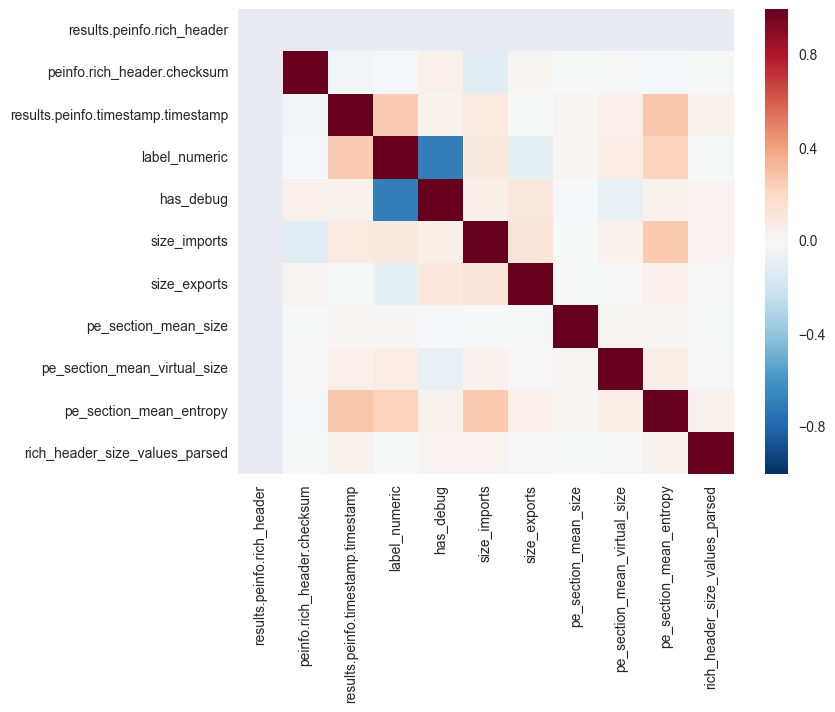

In [39]:
def plotCorrelations(data):
    plt.figure(figsize=(8, 6), dpi=500)
    corr = data.corr()
    sns.heatmap(corr, 
                xticklabels=corr.columns.values,
                yticklabels=corr.columns.values)
    
plotCorrelations(train_df)

In [ ]:
import sklearn.decomposition

def performPCA():
    global X_train
    global X_test
    pca = sklearn.decomposition.PCA(n_components = 30)
    pca.fit(X_train)
    X_train = pca.transform(X_train)
    X_test = pca.transform(X_test)
    
#performPCA()

### Normalize features

In [ ]:
def featureNormalization():
    global X_train
    global X_test
    
    scaler = skpre.StandardScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
#featureNormalization()

## 3.1 - Model selection based on which models do best in CV using default settings:

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 2).fit(X_train, Y_train)

In [ ]:
X_train.columns.values

In [ ]:
rf.feature_importances_

In [ ]:
fe_v = rf.feature_importances_

fe_n = X_train.columns.values

assert len(fe_v) == len(fe_n)

features = []
for i in range(0, len(fe_v)):
    features.append((fe_v[i], fe_n[i]))
    
features.sort(key = lambda x: x[0], reverse = True)
features

LR: 0.757370 (0.027416)
LDA: 0.917961 (0.010895)
KNN: 0.865671 (0.015185)
CART: 0.954699 (0.005780)
NB: 0.591067 (0.049244)
NN: 0.727244 (0.069530)
RF-normal: 0.990231 (0.002644)
RF-tuned: 0.992898 (0.001707)
AB: 0.985295 (0.003831)


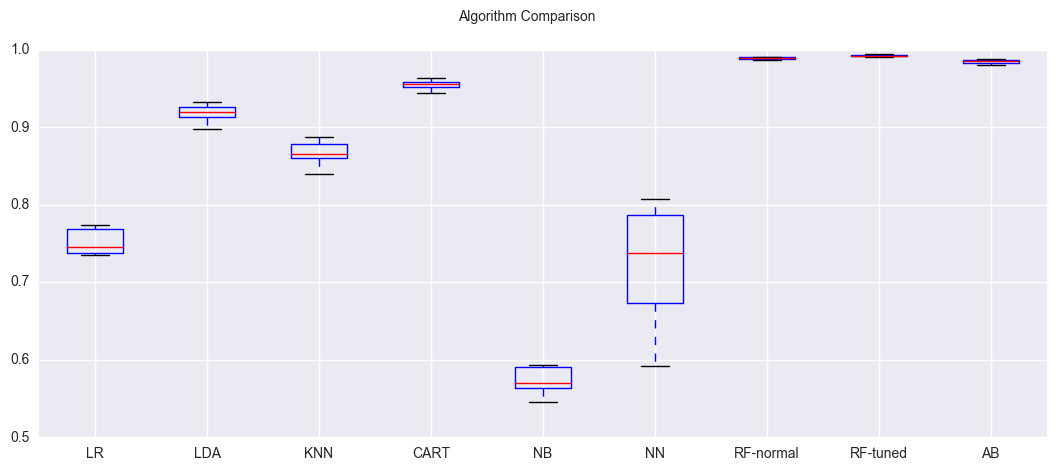

In [42]:
#inspired in http://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/

import sklearn.model_selection as mds
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
#import xgboost as xgb

def modelSelection():

    # prepare data

    #Y_train = train_df[:,-1]
    #X_train = train_df[:,:-1]

    #Y_train = train_df[len(train_df.columns)-1]
    #X_train = train_df.drop(len(train_df.columns)-1,axis=1)

    # prepare configuration for cross validation test harness
    num_folds = 10

    # prepare models
    models = []
    models.append(('LR', LogisticRegression(random_state = 2)))
    models.append(('LDA', LinearDiscriminantAnalysis()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('CART', DecisionTreeClassifier(random_state = 2)))
    models.append(('NB', GaussianNB()))
    #models.append(('SVM-Linear', SVC(kernel="linear")))
    #models.append(('SVM-Poly', SVC(kernel="poly")))
    #models.append(('SVM-RBF', SVC(kernel="rbf", random_state = 2)))
    models.append(('NN', MLPClassifier(random_state = 2)))
    models.append(('RF-normal', RandomForestClassifier(random_state = 2)))
    models.append(('RF-tuned', RandomForestClassifier(criterion="entropy", n_estimators=47, random_state = 2)))
    models.append(('AB', AdaBoostClassifier(random_state = 2)))
    #models.append(('XGB', xgb.XGBClassifier()))

    # evaluate each model in turn
    results = []
    scoring = 'roc_auc' # try with 'roc_auc', f1'

    for model_name, model in models:
        kfold = mds.StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=2)
        cv_results = mds.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
        results.append({"name": model_name, "cv_results": cv_results, "mean": cv_results.mean(), "std": cv_results.std()})
        print("%s: %f (%f)" % (model_name, cv_results.mean(), cv_results.std()))

    # boxplot algorithm comparison
    fig = plt.figure(figsize=(13, 5), dpi=500)
    fig.suptitle('Algorithm Comparison')
    ax = fig.add_subplot(111)
    plt.boxplot([x["cv_results"] for x in results])
    ax.set_xticklabels([x["name"] for x in results])
    plt.show()

    # order the models by the mean auc
    #results_by_strategy.sort(key=lambda x: x["mean"], reverse=True)
    #print([(x["name"], x["mean"]) for x in results])

modelSelection()

## 3.2 - Model selection based on anomaly detection techniques

In [ ]:
import sklearn.ensemble
import sklearn.covariance
from sklearn import svm
import sklearn.metrics

def modelSelectionAnomaly():
    np.random.seed(2)
    ids_not_anomaly = np.random.choice(range(0, X_train.shape[0]), size = 41, replace = False)
    X_train_normal = X_train.values[ids_not_anomaly, :]
    Y_train_normal = Y_train[ids_not_anomaly]
    
    #model = sklearn.ensemble.IsolationForest(n_estimators = 60, contamination = 0.4, random_state = 2)
    model = svm.OneClassSVM(nu=0.3, kernel="linear", gamma=0.1, random_state = 2)
    #model = svm.OneClassSVM(nu=0.07, kernel="rbf", gamma=0.4, random_state = 2)
    #model = sklearn.covariance.EllipticEnvelope()
    
    model.fit(X_train[(Y_train != 1).values])
    anomaly_results = model.predict(X_train[(Y_train == 1).values])
    normal_results = model.predict(X_train_normal)
    
    print("%f %% of the anomalies were correctly classified" % (sum(anomaly_results == -1)/len(anomaly_results)))
    print("%f %% of the ok instances were correctly classified" % (sum(normal_results == 1)/len(normal_results)))
    print("ROC: %f" % 
          sklearn.metrics.roc_auc_score(np.append(np.repeat(-1, 41), np.repeat(1, 41)), np.append(anomaly_results, normal_results)))
    
#modelSelectionAnomaly()

# 4 - Submission to Kaggle

In [60]:
from sklearn.ensemble import RandomForestClassifier

######################################
# Function Save Data To CSV
######################################
def saveDataToCSV(ids, Y_pred):
    submission = pd.DataFrame({
        "sha256": ids,
        "label": Y_pred
    })
    submission = submission[['sha256', 'label']]
    submission.to_csv('submission.csv', index=False)

# choose algorithm
def makeSubmissionKaggle(algorithm):
    global test_df
    
    algorithm.fit(X_train, Y_train)
    Y_pred = algorithm.predict(X_test)
    Y_pred = Y_pred.astype(int)
    Y_pred = ["malicious" if y == 1 else "benign" for y in Y_pred]

    # save data to CSV
    saveDataToCSV(test_df["sha256"].values, Y_pred)
    
#def makeSubmissionAnomalyKaggle(algorithm):
#    algorithm.fit(X_train, Y_train)
#    Y_pred = algorithm.predict(X_test)
#    Y_pred = Y_pred.astype(int)
#    Y_pred = [1 if x == 1 else 0 for x in Y_pred]

    # save data to CSV
#    saveDataToCSV(df_test, Y_pred)
    
#makeSubmissionKaggle("07-spec-mean", xgb.XGBClassifier( learning_rate=0.01, n_estimators=5000, max_depth=7,
#                      min_child_weight=1, gamma=0, subsample=0.55, colsample_bytree=0.85,
#                      reg_alpha=1e-5, objective= 'binary:logistic', scale_pos_weight=1, seed=2))

makeSubmissionKaggle(RandomForestClassifier(criterion="entropy", n_estimators=47, random_state = 2))
#makeSubmissionKaggle(xgb.XGBClassifier())

#makeSubmissionKaggle("09-spec-min", LinearDiscriminantAnalysis(n_components = 1, shrinkage = "auto", solver="lsqr"))
#makeSubmissionKaggle(RandomForestClassifier(criterion = 'entropy', max_features = 'log2', n_estimators = 630))
#makeSubmissionKaggle(RandomForestClassifier(criterion = 'entropy', max_features = 'log2', n_estimators = 310))
#makeSubmissionAnomalyKaggle(svm.OneClassSVM(nu=0.07, kernel="linear", gamma=0.1, random_state = 2))
#makeSubmissionKaggle(svm.OneClassSVM(nu=0.07, kernel="poly", gamma=0.1, random_state = 2))
#makeSubmissionAnomalyKaggle(sklearn.ensemble.IsolationForest(contamination = 0.4, random_state = 2))
#makeSubmissionKaggle(RandomForestClassifier())